# `Linear Regression Practical Implementation`

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
from sklearn.datasets import load_boston

In [7]:
df = load_boston()

In [8]:
df

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [12]:
dataset = pd.DataFrame(df.data)

In [13]:
dataset.columns = df.feature_names

In [14]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [15]:
## Independent features and dependent features
X = dataset
y = df.target

In [16]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [21]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.30, random_state=42)

In [23]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
116,0.13158,0.0,10.01,0.0,0.547,6.176,72.5,2.7301,6.0,432.0,17.8,393.30,12.04
45,0.17142,0.0,6.91,0.0,0.448,5.682,33.8,5.1004,3.0,233.0,17.9,396.90,10.21
16,1.05393,0.0,8.14,0.0,0.538,5.935,29.3,4.4986,4.0,307.0,21.0,386.85,6.58
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24.0,666.0,20.2,368.74,18.13
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,0.17120,0.0,8.56,0.0,0.520,5.836,91.9,2.2110,5.0,384.0,20.9,395.67,18.66
270,0.29916,20.0,6.96,0.0,0.464,5.856,42.1,4.4290,3.0,223.0,18.6,388.65,13.00
348,0.01501,80.0,2.01,0.0,0.435,6.635,29.7,8.3440,4.0,280.0,17.0,390.94,5.99
435,11.16040,0.0,18.10,0.0,0.740,6.629,94.6,2.1247,24.0,666.0,20.2,109.85,23.27


In [26]:
# standardizing the dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [28]:
X_train = scaler.fit_transform(X_train)

array([[-0.41425879, -0.50512499, -1.29214218, ...,  0.18727079,
         0.39651419, -1.01531611],
       [-0.40200818, -0.50512499, -0.16208345, ..., -0.21208981,
         0.3870674 , -0.05366252],
       [-0.39721053, -0.50512499, -0.60948856, ..., -0.16771641,
         0.42854113, -0.31132373],
       ...,
       [-0.41604586,  3.03838247, -1.3166773 , ..., -0.56707702,
         0.35987906, -0.90549329],
       [ 0.92611293, -0.50512499,  1.00549958, ...,  0.8528718 ,
        -2.87841346,  1.52750437],
       [-0.39030549, -0.50512499, -0.37135358, ...,  1.16348561,
        -3.32828832, -0.25218837]])

In [29]:
X_test = scaler.transform(X_test)

In [31]:
scaler.inverse_transform(X_train)

array([[3.71776356e+00, 1.14039548e+01, 2.62379296e+01, ...,
        6.04203300e+01, 3.45700735e+04, 4.94243714e+01],
       [4.56253732e+00, 1.14039548e+01, 8.04907737e+01, ...,
        5.83920879e+01, 3.44988960e+04, 9.79334192e+01],
       [4.89337175e+00, 1.14039548e+01, 5.90113591e+01, ...,
        5.86174481e+01, 3.48113829e+04, 8.49361194e+01],
       ...,
       [3.59453106e+00, 1.81752404e+03, 2.50600262e+01, ...,
        5.65892060e+01, 3.42940434e+04, 5.49642041e+01],
       [9.61467082e+01, 1.14039548e+01, 1.36545117e+02, ...,
        6.38007335e+01, 9.89489244e+03, 1.77692805e+02],
       [5.36952753e+00, 1.14039548e+01, 7.04439507e+01, ...,
        6.53782552e+01, 6.50527757e+03, 8.79191062e+01]])

In [33]:
from sklearn.linear_model import LinearRegression
# cross validation
from sklearn.model_selection import cross_val_score

In [42]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [43]:
mse = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv=10)

In [44]:
np.mean(mse)

-25.55066079166087

In [46]:
## predictionn
reg_pred = regression.predict(X_test)

In [54]:
reg_pred

array([ 39.04510117,  60.42575198,  22.02289883,  47.430121  ,
        10.1616309 ,  45.98703853,  29.39817931,  20.34394737,
        33.58450536,  25.63499523,  42.39562987,  32.27903318,
         1.00944614,  45.07566074,  34.5423654 ,  27.44677663,
        25.44436869,   3.20179647,  58.41352445,   9.46303961,
        42.37404921,  46.58419491,  27.48901084,  29.95070711,
         8.25867331,  22.13881748,  43.64434339,  12.27858124,
        48.97369018,  24.08176873,  33.87244894,  39.07743367,
        22.20083392,  -1.9167273 ,  25.13149437, -11.70565654,
        47.14474806,  32.12111249,  49.53779011,  48.2884569 ,
        21.31738594,  45.65860749,  60.36435916,  44.01843254,
        40.9881054 ,   8.8508354 ,  28.03876746,  49.32573671,
        26.66649042,  36.0500866 ,  32.84426687,  50.41647771,
        30.38287896,  38.04835436,  38.20450015,  26.92558411,
         6.43042073,  52.55331249,  44.71563496,  39.81047075,
        43.91161996,  53.89783927,  40.33026117,  27.18

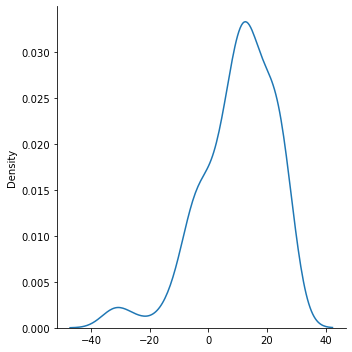

In [53]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind='kde')

In [55]:
from sklearn.metrics import r2_score

In [56]:
score = r2_score(reg_pred,y_test)

In [57]:
score

0.01746045222497472